# Week 11 Group Activity

In [106]:
# SET UP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

### 1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.


In [42]:
football=pd.read_csv('Football Data.csv', parse_dates=True, index_col='Month')

#### a. Import the data into a pandas dataframe.

In [43]:
foot = pd.DataFrame(football)
pd.DataFrame(football)

,Football: (United States),American football: (United States)
Month,,
2004-01-01,13,9
2004-02-01,13,7
2004-03-01,14,5
2004-04-01,14,5
2004-05-01,14,5
...,...,...
2021-07-01,18,10
2021-08-01,20,24
2021-09-01,31,88


#### b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset.

Because this dataset has obvious seasonality (Google Search Interest in 'Football'  throughout the year) and SARIMA does the best job of accounting for seasonaility, SARIMA is the obvious choice for this data set.

### Examining the Data
#### Part 1: Seasonality

Text(0, 0.5, 'Interest Relative to Max')

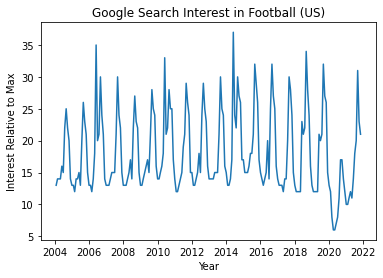

In [74]:
plt.plot(foot.index, foot['Football: (United States)'])
plt.title('Google Search Interest in Football (US)')
plt.xlabel('Year')
plt.ylabel('Interest Relative to Max')
# Clear seasonality.  High Stationarity.

Text(0.5, 1.0, 'Google Search Interest in Football (US)')

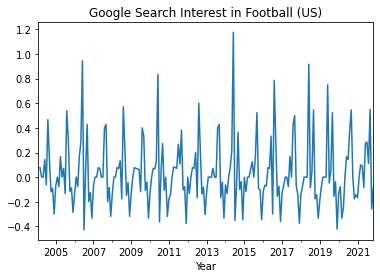

In [76]:
#Stationarizing the Data
foot['Station_Foot']=foot['Football: (United States)'].pct_change()
foot['Station_Foot'].plot()
plt.xlabel('Year')
plt.title('Google Search Interest in Football (US)')

#### Part 2: Correcting Autocorrelation

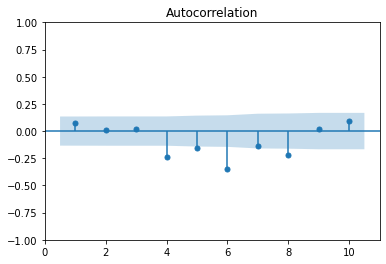

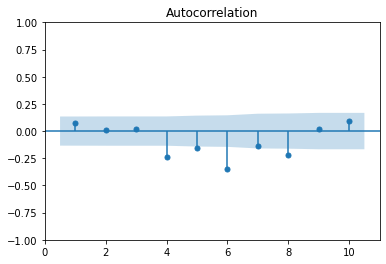

In [60]:
foot = foot.dropna()

# Football Data Autocorrelation
plot_acf(foot[['Station_Foot']], lags = 10, missing='drop', zero = False)

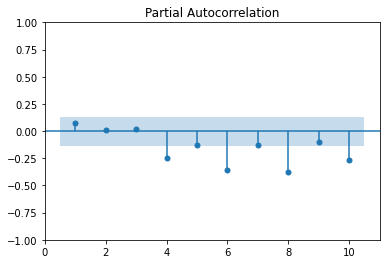

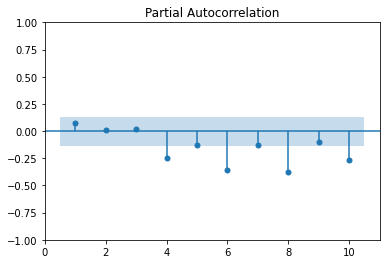

In [62]:
# Football Data Partial Autocorrelation

plot_pacf(foot[['Station_Foot']], lags = 10, zero = False, method='ywm')

#### c. Run either an ARIMA or SARIMA on it.

In [121]:
model = SARIMAX(foot['Station_Foot'], order=(4, 0, 4), seasonal_order=(4, 0, 4, 11))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Station_Foot   No. Observations:                  214
Model:             SARIMAX(4, 0, 4)x(4, 0, 4, 11)   Log Likelihood                  20.533
Date:                            Fri, 03 Dec 2021   AIC                             -7.067
Time:                                    21:50:01   BIC                             50.155
Sample:                                02-01-2004   HQIC                            16.056
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0453      7.222      0.006      0.995     -14.110      14.201
ar.L2         -0.1025      6.886     -0.015      0.988     -13.598      13.393
ar.L3         -0.1797      2.409     -0.075      0.941      -4.901       4.542
ar.L4          0.1714      1.879      0.091      0.927      -3.511       3.853
ma.L1         -0.0771      7.225     -0.011      0.991     -14.239      14.084
ma.L2         -0.2075      6.820     -0.030      0.976     -13.574      13.159
ma.L3          0.2401      4.454      0.054      0.957      -8.489       8.970
ma.L4         -0.3069      3.989     -0.077      0.939      -8.125       7.511
ar.S.L11      -0.0428      0.102     -0.418      0.676      -0.244       0.158
ar.S.L22       1.0290      0.111      9.289      0.000       0.812       1.246
ar.S.L33      -0.0798      0.092     -0.866      0.387      -0.261       0.101
ar.S.L44      -0.9700      0.107     -9.091      0.000      -1.179      -0.761
ma.S.L11       0.0813      0.364      0.223      0.823      -0.633       0.796
ma.S.L22      -0.9762      0.325     -3.002      0.003      -1.614      -0.339
ma.S.L33       0.1498      0.385      0.389      0.698      -0.606       0.905
ma.S.L44       0.8525      0.519      1.644      0.100      -0.164       1.869
sigma2         0.0381      0.015      2.624      0.009       0.010       0.066
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):               100.78
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             1.12
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Because there were 4 points outside the confidence interval when I ran the autocorrelation, I used 4 in the AR position of the order argument when running SARIMA. Similarly, there were 4 points outside the confidence interval when I ran the partial autocorrelation, so I used 4 in the MA position of the order argument.  I tried several iterations using various values in the fourth position for seasonal order, and I found that the model SARIMAX(4, 0, 4)x(4, 0, 4, 11)	was the best combination with an AIC value of 7.

#### d. Explain the results.

Honestly, I'm still trying to wrap my head around what I'm looking at in these results. But my best understanding at the moment is that the ar.L1 model is the best because there is a 99.5% probability that the data will fall within the confidence interval.  The AIC value is very low, and I understand that (for whatever reason) that is a good thing.  

#### e. Discuss your findings with your group and explain what trend someone else chose and why they chose the model they did.

Carla and Clarine looked at the data pertaining to searches for Kim Kardashian.  Clarine used ARIMA because she thought that made the most sense to her after examining all three options.  Carla took a different approach, running a stationary and a differencing test.  The t-statistic showed that her data was stationary and the differencing test was false, so she used the default test in that situation, which is ARMA.

### 2. What is a fourier transform? 

A fourier transform breaks a function down into components that can be represented by sine or cosine curves. It converts data that has been recorded over time and instead maps it over frequency.

#### Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements

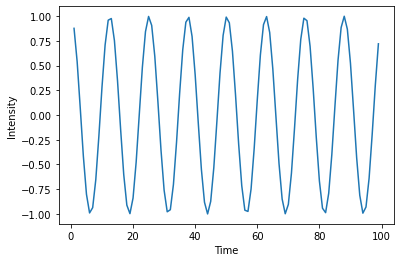

In [122]:
x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

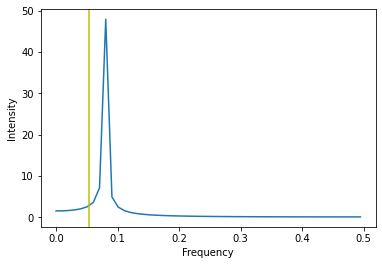

In [123]:
#power spectral density
psd = np.abs(np.fft.rfft(y)) 
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

The Power Spectral Density (psd) measures the power content against the frequency. FFT stands for fast fourier transform.  RFFT calculates the Fast Fourier Transform of the complex components for half of the frequency range.  I don't understand the use of 1/6*pi in line 6 above and would love more information about that.  Because of this, I don't know if I need to use a different value for the plt.axvline command in line 7.  In short, I still have a lot to learn about Fourier Transforms.  I don't know enough to do any interpretation of this FFT.